In [270]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [271]:
%run mylibrary.ipynb

env: CUDA_VISIBLE_DEVICES=1


In [272]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math

In [273]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()

In [274]:
visualizer = Visualizer(AA_Geometry)

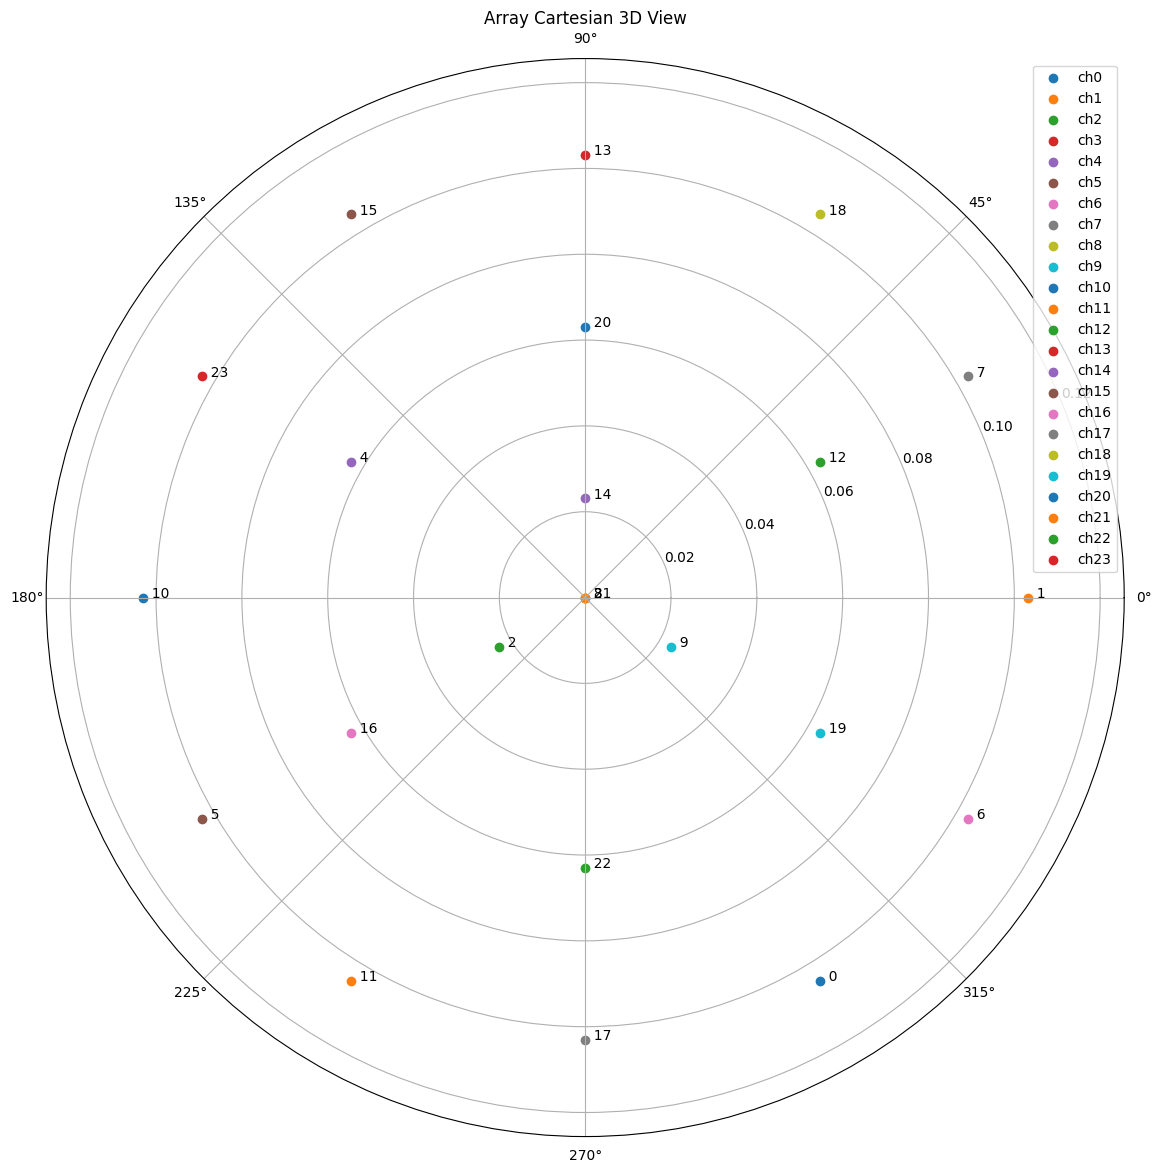

In [430]:
visualizer.polar()

In [178]:
data = DataExtract("../data/rss45/", 24)
inputs = data.get_delays()
labels = data.get_angles()

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin']


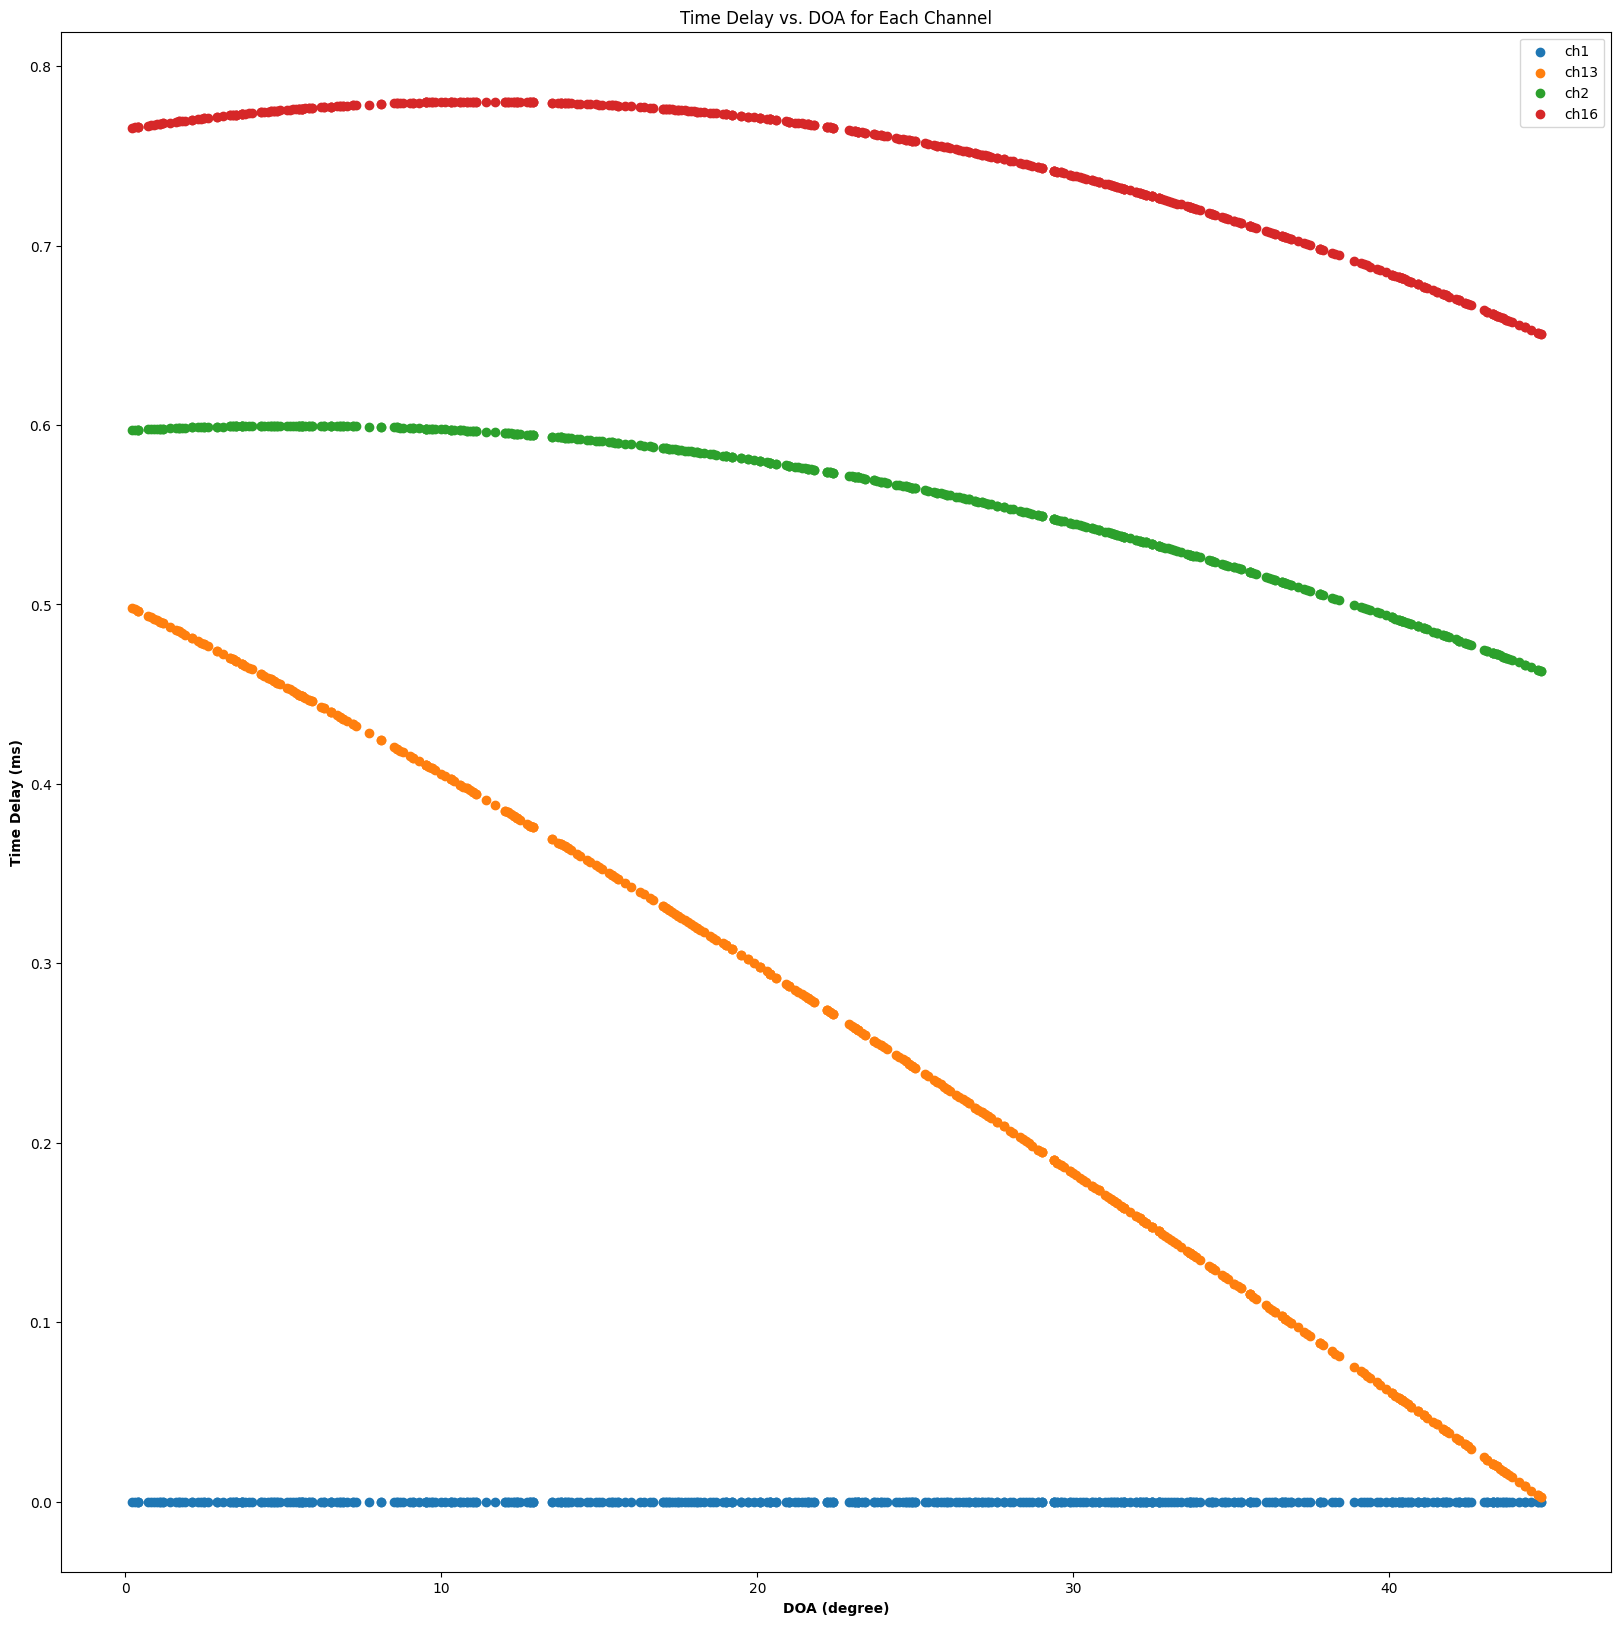

In [431]:
channel_id = [1,13,2,16]
#channel_id = list(range(0,24))
dataset = DataSetPacker(inputs, labels, channel_id)
dataset.plot()

In [432]:
train_dataset, val_dataset, test_dataset = dataset.split()

In [433]:
model = MyModel(np.shape(channel_id))

In [434]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(np.shape(channel_id)),
    tf.keras.layers.Dense(units=16, activation='gelu'),
    tf.keras.layers.Dense(units=8, activation='gelu'),
    #tf.keras.layers.Dense(units=4, activation='gelu'),
    tf.keras.layers.Dense(units=1, activation = 'linear')
])


In [435]:
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [436]:
losses = model.fit(train_dataset.batch(8), epochs=100, validation_data = val_dataset.batch(8))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 703.5206 - mae: 23.2256 - mse: 703.5206 - val_loss: 678.8365 - val_mae: 22.5817 - val_mse: 678.8365
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 684.5359 - mae: 22.7689 - mse: 684.5359 - val_loss: 644.0215 - val_mae: 21.8080 - val_mse: 644.0215
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 645.4359 - mae: 21.8858 - mse: 645.4359 - val_loss: 573.9787 - val_mae: 20.2112 - val_mse: 573.9787
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 571.9753 - mae: 20.1932 - mse: 571.9753 - val_loss: 470.3032 - val_mae: 17.9700 - val_mse: 470.3032
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 450.5589 - mae: 17.4686 - mse: 450.5589 - val_loss: 350.8136 - val_mae: 15.4661 - val_mse: 350.8136
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 332.9249 - mae: 15.0788 - mse: 332.9249 - val_loss: 264.6340 - val_mae: 13.7475 - val_mse: 264.6340
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


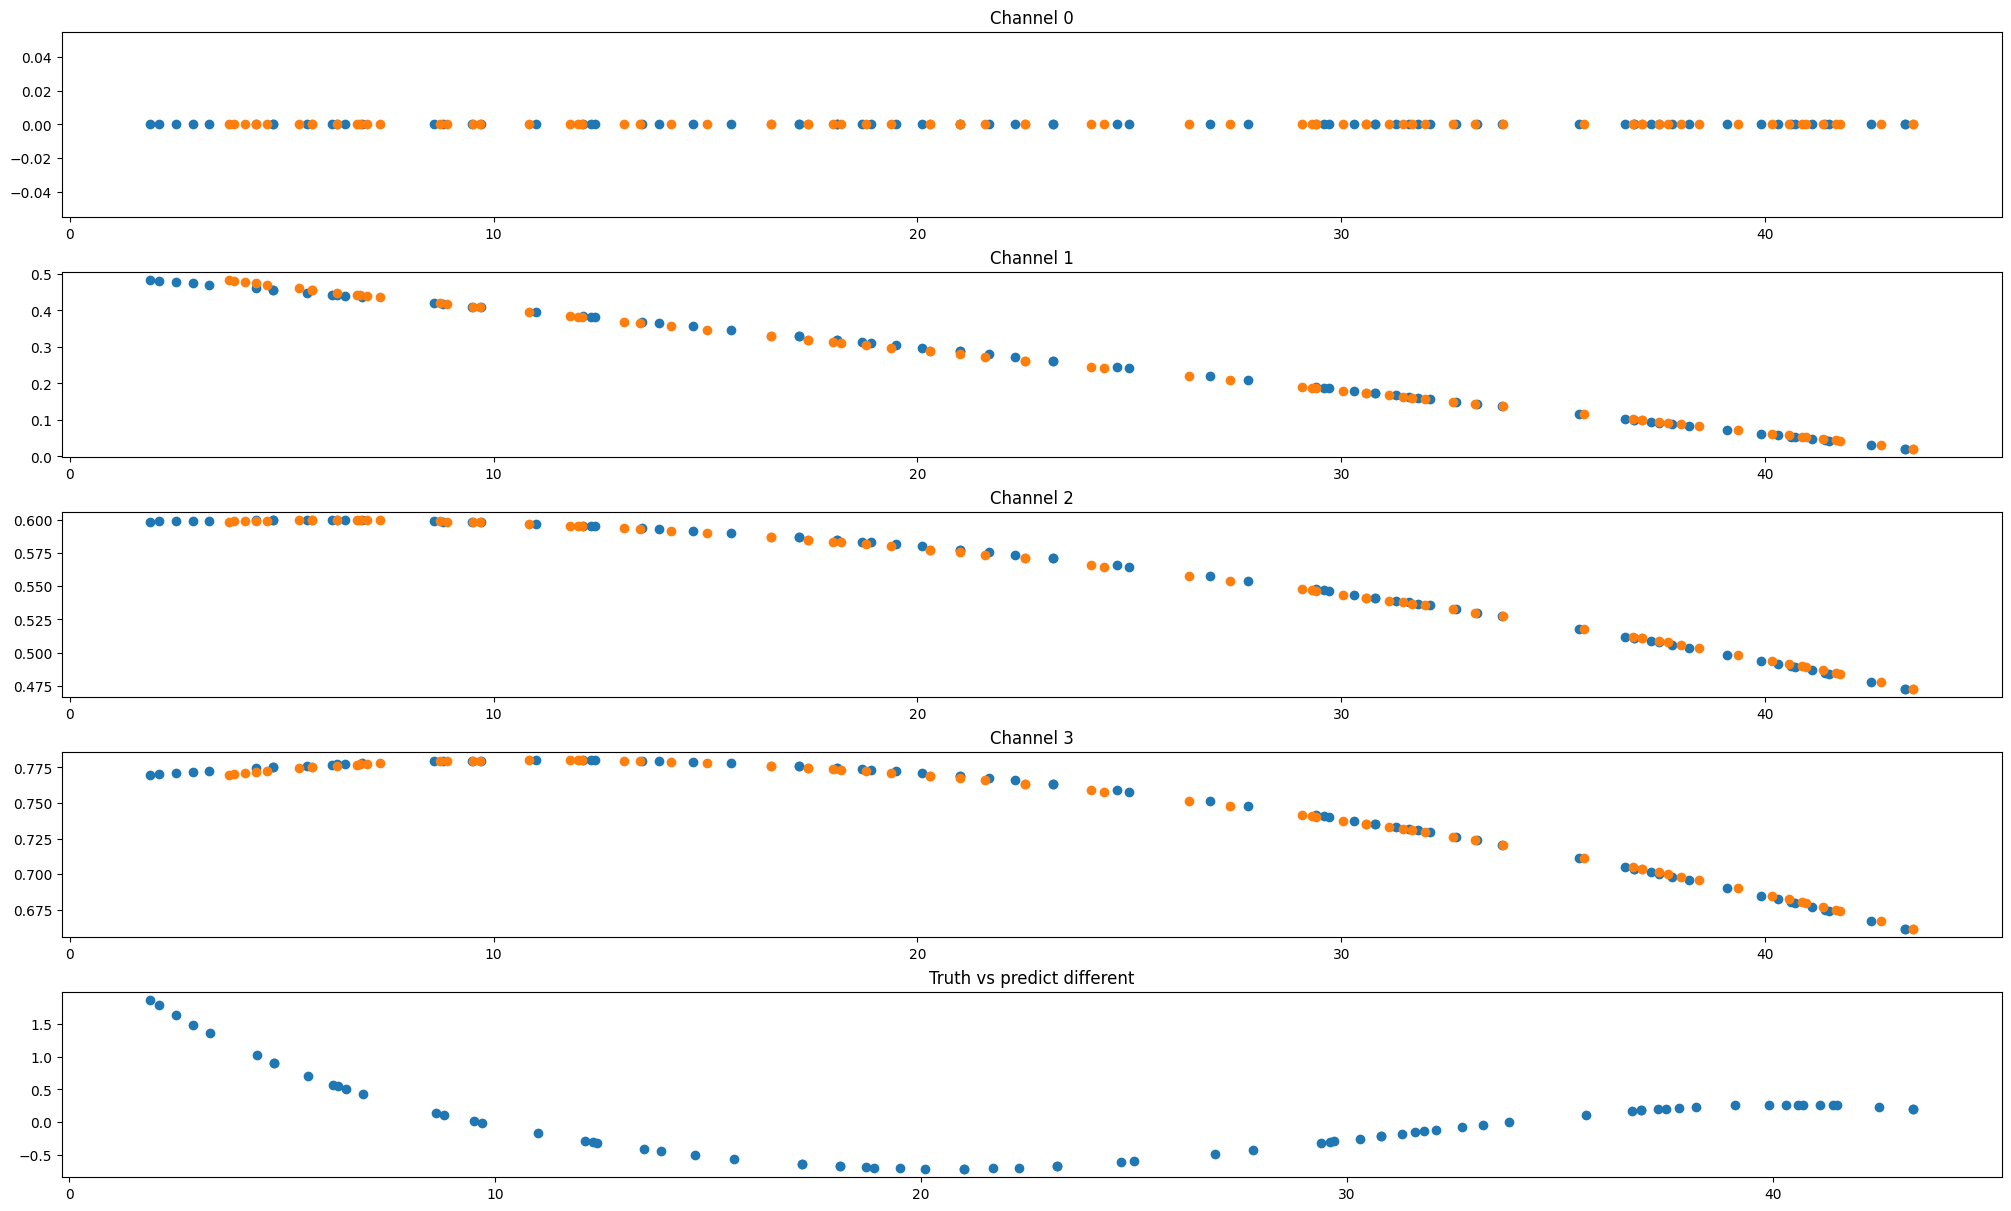

In [437]:
#fig = plt.figure(figsize=(20,20))
#ax = fig.axes()
fig, axs = plt.subplots(ncols = 1, nrows = len(channel_id) + 1, figsize = (20,len(channel_id)*3), layout="constrained")
for x,y in test_dataset.batch(100):
    for i in range(x.shape[1]):
        axs[i].scatter(y, x[:,i])
        axs[i].scatter(model.predict(x), x[:,i])
        axs[i].set_title("Channel {}".format(i))
    axs[-1].scatter(y, model.predict(x) - y)
    axs[-1].set_title("Truth vs predict different")

In [255]:
x = test_dataset.take(1)

In [257]:
i, label=list(x.as_numpy_iterator())[0][0], list(x.as_numpy_iterator())[0][1]

In [258]:
i = i.reshape(-1,4)
i

array([[ 0.        , -0.11550159, -0.11092727,  0.04316626]],
      dtype=float32)

In [260]:
model.predict(i), label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


(array([[41.5511]], dtype=float32), array([41.5], dtype=float32))